# K Nearest Neighbour
The k-Nearest Neighbors (kNN) algorithm is arguably the simplest machine learning, KNN can be used for both classification and regression predictive problems. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y. Building the model only consists of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset, it “nearest neighbors”.

In [206]:
from scipy.io import arff
import numpy as np
import pandas
import sys
sys.path.append('c:/users/achyu/appdata/local/programs/python/python36-32/lib/site-packages')
import arff
#train data
dataset = arff.load(open('trainProdSelection.arff'))
Dtrain_data=pandas.DataFrame(dataset['data'])
Dtrain_attributes=pandas.DataFrame(dataset['attributes'])
Dtrain_attributes[0]
Dtrain_data.columns=Dtrain_attributes[0]
Dtrain_data

#test data
test_dataset=arff.load(open('testProdSelection.arff'))
Dtest_data=pandas.DataFrame(test_dataset['data'])
Dtest_attributes=pandas.DataFrame(test_dataset['attributes'])
Dtest_attributes[0]
Dtest_data.columns=Dtest_attributes[0]

In [207]:
Dtrain_label=list(Dtrain_data['label'])
Dtest_label=list(Dtest_data['label'])
Dtrain=Dtrain_data.drop(['label'], axis=1)
Dtest=Dtest_data.drop(['label'], axis=1)

### Performing Normalization :
    X(Norm)= (X(i)-minimum(X))/(maximum(X)-minimum(X))

In [208]:
col=['Vacation','eCredit','salary','property']
#Dtrain[col]=(Dtrain[col]).apply(lambda x: round((x - np.mean(x)) / (np.std(x)),5))
#Dtest[col]=(Dtest[col]).apply(lambda x: round((x - np.mean(x)) / (np.std(x)),5))
Dtrain[col]=(Dtrain[col]).apply(lambda x: (x - min(x)) / (max(x)-min(x)))
Dtest[col]=(Dtest[col]).apply(lambda x: (x - min(x)) /(max(x)-min(x)))
#Dtrain[col]=(Dtrain[col].apply(lambda x:(x=min(x))/(max(x)-min(x))))

### One hot Encoding:

In [209]:
Dtrain=pandas.get_dummies(Dtrain,prefix=['Type','LifeStyle'],drop_first=True)
Dtest=pandas.get_dummies(Dtest,prefix=['Type','LifeStyle'],drop_first=True)

### Euclidean Distance:

In [210]:
import math
import pandas as pd
import operator
def EuclideanDistance(x,y):
    distance = 0.0
    for i in range(len(x)):
        #print(x[i],"test")
        #print(y[i],"train")
        distance = distance+math.pow((float(x[i])-float(y[i])),2)
        #print(distance,i,"----------------")
    distance = math.sqrt(distance)
    #print(distance)
    #print("finished")
    return distance
result1=[]
def KNNmatch(train,test,k,train_label):
    dictionary={}
    p=0
    for index, i in test.iterrows():
        l1=[]
        temp=[]
        count={}
        #print(i,"test data")
        for index1, j in train.iterrows():
            #print(index1)
            #print(j)
            dist=EuclideanDistance(i,j)
            l1.append((dist,train_label[index1]))
        l1.sort(key=operator.itemgetter(0))
        #print(l1)
        temp=l1[:k]
        
        for a in temp:
            if a[1] in count:
                count[a[1]]=count[a[1]]+1
            else:
                count[a[1]]=1
        e=list(count.items())
        d=pd.DataFrame(e)
        dFilter=d[d[1]==d[1].max()]
        fg = dFilter.sort_values(by = 0,ascending=True).head(1)
        #print(fg[0].values[0])   
        result1.append(fg[0].values[0])

### Accuracy:
    Accuracy=Number of correct labels/(Total number of actual labels)*100

In [211]:
def accuracy(label):
    pos=0
    k1=0
    for i in label:
        #print(i,"----------",result1[k1])
        if (i==result1[k1]):
            pos=pos+1
        k1=k1+1
    #print(pos,"positive values")
    accuracy=(pos/len(label))*100
    return accuracy
    #print(accuracy)

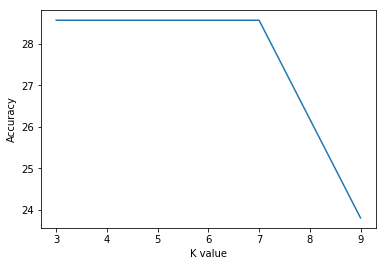

In [212]:
import matplotlib.pyplot as plt
acc=[] 
for i in range(3,10,2):
    result1=[]
    KNNmatch(Dtrain,Dtest,i,Dtrain_label)
    acc.append(accuracy(Dtest_label))
plt.plot(range(3,10,2),acc)
plt.ylabel('Accuracy')
plt.xlabel('K value')
plt.show()

### Observations:
    When we calculated the accuracy between the train and test datasets we found the accuracy of about 28.57% .

### Calculating accuracy through Validation:

In [213]:
from sklearn.model_selection import train_test_split
train, train_validation, train_labels, validation_labels = train_test_split(Dtrain_data, Dtrain_label, random_state = 1, test_size = 0.09)
train=train.reset_index(drop=True)
train_validation=train_validation.reset_index(drop=True)
#train_labels=train_labels.reset_index(drop=True)
#validation_labels=validation_labels.reset_index(drop=True)

In [214]:
train=train.drop(['label'], axis=1)
train_validation=train_validation.drop(['label'], axis=1)


In [215]:
col=['Vacation','eCredit','salary','property']
#train[col]=(train[col]).apply(lambda x: (x - np.mean(x)) / (np.std(x)))
#train_validation[col]=(train_validation[col]).apply(lambda x: (x - np.mean(x)) / (np.std(x)))
train[col]=(train[col]).apply(lambda x: (x - min(x)) / (max(x)-min(x)))
train_validation[col]=(train_validation[col]).apply(lambda x: (x - min(x)) /(max(x)-min(x)))

In [216]:
train=pandas.get_dummies(train,prefix=['Type','LifeStyle'],drop_first=True)
train_validation=pandas.get_dummies(train_validation,prefix=['Type','LifeStyle'],drop_first=True)

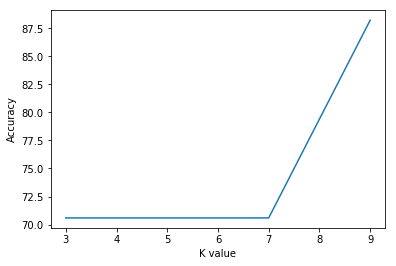

In [217]:
import matplotlib.pyplot as plt
acc=[]
for i in range(3,10,2):
    result1=[]
    KNNmatch(train,train_validation,i,train_labels)
    acc.append(accuracy(validation_labels))
plt.plot(range(3,10,2),acc)
plt.ylabel('Accuracy')
plt.xlabel('K value')
plt.show()

### Observations:
    When we calculated the accuracy between the trained dataset and validation dataset then accuracy is about 87.5%

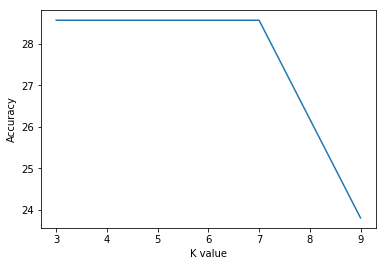

In [218]:
import matplotlib.pyplot as plt
acc=[]
for i in range(3,10,2):
    result1=[]
    KNNmatch(train,Dtest,i,train_labels)
    acc.append(accuracy(Dtest_label))
plt.plot(range(3,10,2),acc)
plt.ylabel('Accuracy')
plt.xlabel('K value')
plt.show()

### Observations:
    When we calculated the accuracy between the train dataset for applied validation and testing dataset then we get 
    accuracy of 28.57%.